In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Problemas capítulo 2


**Problema 2.3**

This problem studies error propagation for specific examples. Specifically, at x = 2 find the: 

(a) absolute error in $f(x)=lnx$ for $\tilde{x}$ = 1.9, 

(b) relative error in $f(x) = \sqrt{2}$ for $\tilde{x}$ = 1.95, and 

(c) backward error for $f(x) = e^x$ and $\tilde{f}(2)= e^2 = 8$.

***Solución***

*Inciso (a)*

Sabemos que

$\Delta y \approx \frac{df(x)}{dx}\Delta x$

donde $\Delta x=\tilde{x}-x$, en este caso $\Delta x= 2-1.9=0.1$, y $\frac{df(x)}{dx}=\frac{1}{x}$, evaluando y sustituyendo:

$\Delta y \approx \frac{df(x)}{dx}\Delta x=\frac{0.1}{2}=0.05$

*Inciso (b)*

Sabemos que el error relativo es:

$\delta y=\frac{x}{f(x)}\frac{df(x)}{dx}\delta x$

donde $\delta x=\frac{\tilde{x}-x}{x}=\frac{1.95-2}{2}=-0.0125$, luego la derivada es $\frac{df(x)}{dx}=\frac{1}{2\sqrt{x}}$, finalmente sustituimos y evaluamos:

$\delta y=\frac{2}{\sqrt{2}}\frac{1}{2\sqrt{2}}(-0.025)=-0.0125$

*Inciso (c)*

Sea $y=f(x)=e^x$, y $\tilde{y}=\tilde{f}(x)=e^2=8$, entonces:

$\tilde{x}-x=ln8-2=0.0794$

**Problema 2.6**


Take the standard quadratic equation: $ax^2 + bx + c = 0$, whose solutions are:

$$x\pm = \frac{-b\pm \sqrt{b^2-4ac}}{2a} $$

Take $b > 0$ for concreteness. It is easy to see that when $b^2 \gg ac$ we don’t get a catastrophic cancellation when evaluating $b^2 − 4ac$ (we may still get a “benign” cancellation). Furthermore, $\sqrt{b^2 − 4ac }\approx b$. However, this means that $x_{+}$ will involve catastrophic cancellation in the numerator. We will employ an analytical trick in order to help us preserve significant figures. Observe that the product of the two roots obeys the relation: $x_{+} x_{−} = c/a$. The answer now presents itself: use Eq. (2.93) tocalculate $x_{−}$,for which no catastrophic cancellation takes place.Then,use $x_{+}x_{−} = c/a$ to calculate $x_{+}$. Notice that you ended up calculating $x_{+}$ via division only (i.e., without a catastrophic cancellation). Write a Python code that evaluates and prints out: (a) $x_{−}$, (b) $x_{+}$ using the “bad” formula, and (c) $x_{+}$ using the “good” formula. Take $a = 1, c = 1, b = 10^8$. Discuss the answers.

***Solución***

Escribimos un programa que calcula las raices para una ecuación cuadrática.

In [396]:
#Definimos las variables para resolver el ejercicio, en este caso primero escribimos las constantes para la ecuación a resolver
a=1
b=10e8
c=1
#Llamamos a xp la raíz positiva y xn la raiz negativa resolviendo primero en la forma tradicional
xp=(-b+np.sqrt(pow(b,2)-4*a*c))/(2*a)
xn=(-b-np.sqrt(pow(b,2)-4*a*c))/(2*a)
#Para encontrar a la raíz positiva se realiza con un simple despeje
x=c/(a*xn)
#Se imprime la ecuación que se resuleve junto con sus soluciones
print("La raiz negativa es: ",xn)
print("La raiz positiva usando la ecuación general es: ",xp)
print("La raiz positiva usando la otra formula es: ",x)

La raiz negativa es:  -1000000000.0
La raiz positiva usando la ecuación general es:  0.0
La raiz positiva usando la otra formula es:  -1e-09


**Problema 2.9**

This problem focuses on analytical manipulations introduced in order to avoid
a cancellation. Rewrite the following expressions in order to evaluate them for large x:

(a) $\sqrt{x+1}− \sqrt{x}$, (b) $\frac{1}{x+1}-\frac{2}{x}+\frac{1}{x−1}$, and (c) $\frac{1}{\sqrt{x}}-\frac{1}{\sqrt{x+1}}$.

***Solución***

**Problema 2.12**

This problem studies the rational function introduced in the main text, Eq. (2.53).

(a) Apply Horner’s rule twice(once for the numerator and once for the denominator) to produce two plots, one for $x = 1.606 + 2^{−52}i$ and one for $x = 2.400 + 2^{−52}i$. Your results should look like Fig. 2.3.

(b) Create a new Python function that codes up the following expression:

$$s(x)=4-\frac{3(x-2)[(x-5)^2+4]}{x+(x-2)^2[(x-5)^2+3]}$$

which is a rewritten version of our rational function. Apply this new function for the previous two plots and compare the rounding error pattern, size, etc.

(c) Now introduce two more sets of results, this time for the starting expression for $r(x)$ produced using (not Horner’s rule but) the naive implementation, using powers (i.e., the way you would have coded this up before doing problem 2.11). Interpret your findings.


***Solución***

*Inciso (a)*

La ecuación (2.53) es:

$r(x)=\frac{4x^4-59x^3+324x^2-751x+622}{x^4-14x^3+72x^2-151x+112}$

Evaluamos el polinomio utilizando la regla de Horne, para el valor de  $𝑥=1.606+2^{−52}𝑖$  escribimos el siguiente codigo:

Para el denominador

In [397]:
def r(a0,a1,a2,a3,a4,x0):
    r=a0+x0*(a1+(x0*(a2+x0*(a3+x0*a4))))
    return r
rn=r(622,-751,324,-59,4,complex(1.606,pow(2,-52)))
rd=r(112,-151,72,-14,1,complex(1.606,pow(2,-52)))
rx=rn/rd
print (rx)

(8.75237658077848+2.7019476053759343e-18j)


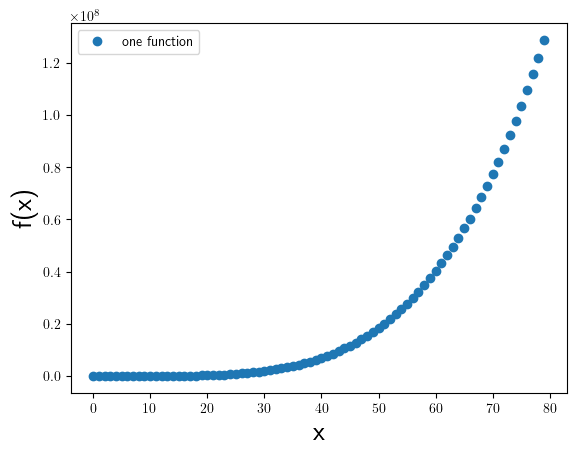

In [185]:
def plotex(xs,rx):
    plt.xlabel("x", fontsize=20)
    plt.ylabel("f(x)", fontsize=20)
    plt.plot(xs, rx, "o", label="one function") 
    plt.legend()
    plt.show()
xs = [i for i in range(80)] 
rx = [r(622,-751,324,-59,4,x) for x in xs]

plotex(xs,rx)



In [402]:
def s(x):
    s=4-(3*(x-2)*(pow(x-5,2)+4))/(x+(pow(x-2,2))*(pow(x-5,2)+3))
    return s
sx=s(complex(1.606,pow(2,-52)))
print (sx)

(8.752376580778488+2.7019476053841107e-18j)


**Problema 2.15**

Here we study the Basel problem, namely the sum of the reciprocals of the squares of the positive integers. This also happens to be a specific value of the Riemann zeta function, $\zeta(2)$. The value can be calculated in a variety of ways and turns out to be:
$$\sum_{k=0}^{\infty} \frac{1}{k^2}=\frac{\pi^2}{6}=1.6449340668482264...$$
Here we will use Python to compute partial sums.

(a) Code this up by adding all the contributions from $k = 1, 2, $ up to some large integer; break out of the loop when the value of the sum stops changing. What is the value of the sum when this happens? Is there some meaning behind the value of the maximum integer (inverse squared) when this happens? Call this $nmaxd$.

(b) We were summing the contributions from largest to smallest, so by the time we got to the really tiny contributions they stopped mattering. The obvious fix here is to reverse the order in which we are carrying out the sum. This has the advan- tage of dealing with the tiniest contributions first (you may have encountered the term “subnormal numbers” in appendix B). The disadvantage is that our previous strategy regarding termination (break out when the sum stops changing) doesn’t apply here: when summing in reverse the last few contributions are the largest in magnitude. Instead, simply pick a large maximum integer $nmaxr$ from the start. Be warned that this will start to take a long time, depending on the CPU you are using. Do a few runs for nmaxr a multiple of $nmaxd (4, 8, 16, 32)$. You should see the answer get (slowly) better. The beauty here is that the larger nmaxr, the better we can do. (Try increasing nmaxd for the direct method.)

(c) Employ compensated summation to carry out the sum. The Kahan sum function does well, despite the fact that it carries out the sum in direct order, i.e., by starting from the largest contribution. We don’t have a nifty termination criterion, but increasing the number of terms can still make a difference.

In [349]:
#Hacemos un ciclo for para la función de Bessel
def Basel(n):
    b=0
    for i in range (1,n+1,1):
        b=b+1/i**2
        
    return b
nmaxd=95000000
print(Basel(nmaxd))

1.644934057834575


In [350]:
#Hacemos una función Basel que sume de reversa
def Baselr(x):
    br=0
    for i in range (x,0,-1):
        br=br+1/i**2
    return br
nmaxr=4*nmaxd
print (Baselr(nmaxr))

1.6449340642166475


In [361]:
#Hacemos la función de Basel empleando la suma de Kahan
def kahansum(xs):
    s = 0.; e = 0.
    for x in xs:
        temp = s
        y=x+e
        s = temp + y
        e = (temp - s) + y
    return s
xs = [0.7, 0.1, 0.3]
print(sum(xs), kahansum(xs))

1.0999999999999999 1.1
